# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = 'C:/Users/Yuan/Desktop/100day/3rd-ML100Days/homework/D5/D5_DATA/Part01/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

### 目的:探索資料離散化後的準確率是否上升
1. 首先以DAYS_BIRTH為基準來查看與其他欄位的相關性
2. 接著找一個相關係數高的來分析觀察
3. 觀察這兩欄資料狀況，並進行前處理。ex: NaN補值、負值轉正值、出生天數轉年齡...
4. 離散化，將年齡分組分群
5. 可視化，密度函數長條圖


In [6]:
# 1.首先以DAYS_BIRTH為基準來查看與其他欄位的相關性
tar_corr = app_train.corr()['TARGET']
tar_corr.sort_values()

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED_ANOM            -0.045987
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, Length: 110, dtype: float64

In [7]:
app_train.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

#### 2. 找一個相關係數高的來分析觀察
- 觀察:由上面結果可以得到EXT_SOURCE_3、DAYS_EMPLOYED、DAYS_BIRTH都是蠻高的相關性
- 挑選:挑選較高的相關係數，作為我們input features。(EXT_SOURCE_3、DAYS_EMPLOYED、DAYS_BIRTH)
- 執行:建立一個獨立DataFrame儲存這三個features，做為後續分組用

In [8]:
# 2.找一個相關係數高的來分析觀察
# 並建立一個獨立DataFrame
age_app = app_train[['TARGET', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
age_app.head()

,TARGET,EXT_SOURCE_3,DAYS_EMPLOYED,DAYS_BIRTH
0,1,0.139376,-637.0,9461
1,0,NaN,-1188.0,16765
2,0,0.729567,-225.0,19046
3,0,NaN,-3039.0,19005
4,0,NaN,-3038.0,19932


In [9]:
print(age_app[age_app['EXT_SOURCE_3'].isnull()].shape)
print(age_app[age_app['DAYS_EMPLOYED'].isnull()].shape)
print(age_app[age_app['DAYS_BIRTH'].isnull()].shape)

(60965, 4)
(55374, 4)
(0, 4)


#### 3. 資料前處理
- 觀察:從上面我們看到資料有的是負值、有的有NaN
- 執行:
    1. 負值轉正，<hint> abs()
    2. NaN填補，<hint> fillna()，這裡以**中位數**填補NaN
    3. 丟棄NaN，<hint> dropna()

In [10]:
print(age_app['EXT_SOURCE_3'].describe())
age_app['EXT_SOURCE_3'] = age_app.EXT_SOURCE_3.fillna(0.53)

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


In [11]:
age_app['DAYS_EMPLOYED'] = abs(age_app['DAYS_EMPLOYED'])
print(age_app['DAYS_EMPLOYED'].describe())
age_app['DAYS_EMPLOYED'] = age_app.DAYS_EMPLOYED.fillna(1648)

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64


In [12]:
print(age_app[age_app['EXT_SOURCE_3'].isnull()].shape)
print(age_app[age_app['DAYS_EMPLOYED'].isnull()].shape)
print(age_app[age_app['DAYS_BIRTH'].isnull()].shape)

(0, 4)
(0, 4)
(0, 4)


#### 3. 資料前處理
- 觀察:
    1. 上面已完成NaN填補和轉正
    2. 但DAYS_EMPLOYED、DAYS_BIRTH的表達方式還是以天數計數，需要轉換
- 執行:
    1. 將DAYS_EMPLOYED、DAYS_BIRTH轉換 *單位:年*
    2. 轉換後進行分組

In [13]:
# 將出生天數轉換年齡，並查看年齡範圍，供後續離散化分組分群用
age_app['YEARS_BIRTH'] = age_app['DAYS_BIRTH'] // 365
age_app['YEARS_EMPLOYED'] = age_app['DAYS_EMPLOYED'] //365
print(age_app['YEARS_BIRTH'].describe(),'\n')
print(age_app['YEARS_EMPLOYED'].describe())

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64 

count    307511.00000
mean          5.67020
std           5.86224
min           0.00000
25%           2.00000
50%           4.00000
75%           7.00000
max          49.00000
Name: YEARS_EMPLOYED, dtype: float64


#### 4.離散化，將年齡分組分群

In [14]:
bin = np.linspace(20, 70, 11)
age_app['YEARS_BINNED'] = pd.cut(age_app['YEARS_BIRTH'], bins=bin, right=False)

In [15]:
age_app.head()

,TARGET,EXT_SOURCE_3,DAYS_EMPLOYED,DAYS_BIRTH,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_BINNED
0,1,0.139376,637.0,9461,25,1.0,"[25.0, 30.0)"
1,0,0.530000,1188.0,16765,45,3.0,"[45.0, 50.0)"
2,0,0.729567,225.0,19046,52,0.0,"[50.0, 55.0)"
3,0,0.530000,3039.0,19005,52,8.0,"[50.0, 55.0)"
4,0,0.530000,3038.0,19932,54,8.0,"[50.0, 55.0)"


In [16]:
x_train = age_app.loc[:, ['EXT_SOURCE_3', 'YEARS_EMPLOYED', 'YEARS_BIRTH']].values
Y_train = age_app.TARGET.values

#### 5. Cross validation score
- 前面已經依照年齡分好組了
- 我們來測試使用這3組features(EXT_SOURCE_3, YEARS_EMPLOYED, YEARS_BIRTH)來預測TARGET的準確率
    1. 演算法使用: LogisticRegression
    2. Use cross_val_score來看平均準確率多少

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [18]:
estimator = LogisticRegression()
continuous = cross_val_score(estimator, x_train, Y_train, cv=5).mean()

#### 5. Cross validation score
- 前面已經得到成功預測TARGET的準確率是多少
- 我們現在要單獨找出每個組別(group)的準確率是多少，是否分組預測會提高準確率?
    1. 找出每個組別的x_train、Y_train才能得到TARGET準確率
    2. 透過cross_val_score() 找出每組的準確率
    3. 平均這5組的準確率，看是否比不分組有更高的準確率

In [19]:
age_group = age_app.sort_values(by=['YEARS_BINNED'])['YEARS_BINNED'].unique()
age_group

[[20.0, 25.0), [25.0, 30.0), [30.0, 35.0), [35.0, 40.0), [40.0, 45.0), [45.0, 50.0), [50.0, 55.0), [55.0, 60.0), [60.0, 65.0), [65.0, 70.0)]
Categories (10, interval[float64]): [[20.0, 25.0) < [25.0, 30.0) < [30.0, 35.0) < [35.0, 40.0) ... [50.0, 55.0) < [55.0, 60.0) < [60.0, 65.0) < [65.0, 70.0)]

In [20]:
def group_train(group_num):
    x_train = age_app[age_group[group_num] == age_app['YEARS_BINNED']].loc[:, ['EXT_SOURCE_3', 'YEARS_EMPLOYED', 'YEARS_BIRTH']]
    Y_train = age_app[age_group[group_num] == age_app['YEARS_BINNED']].loc[:, ['TARGET']]
    return x_train, Y_train

In [21]:
val_score = []
for i in np.arange(0,10):
    x_train, Y_train = group_train(i)
    val_score.append(cross_val_score(estimator, x_train.values, Y_train, cv=5).mean())
discret = np.array(val_score).mean()
np.array(val_score)

array([0.87687245, 0.88861492, 0.89713229, 0.91068596, 0.92140719,
       0.92584052, 0.93300327, 0.94470603, 0.94722091, 0.96281713])

In [22]:
print('Discretization cross valdition score = %.2f' % discret)
print('Continuous cross valdition score = %.2f' % continuous)

Discretization cross valdition score = 0.92
Continuous cross valdition score = 0.92


#### 6. 資料可視化

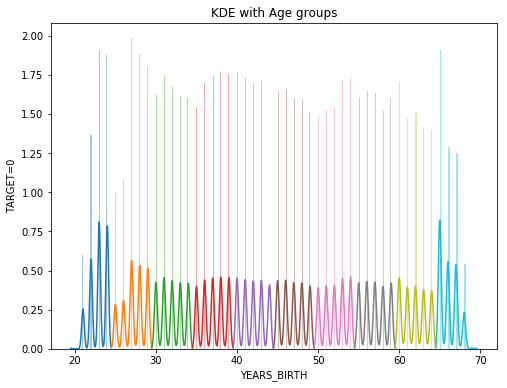

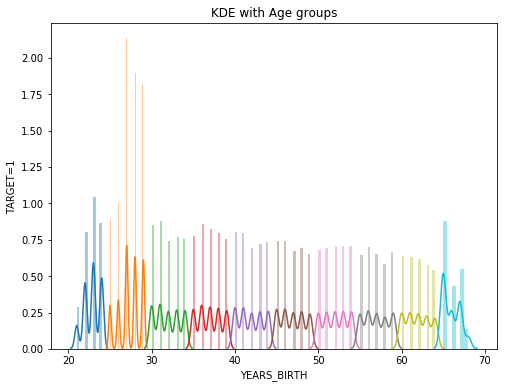

In [23]:
# 第一張圖是畫出(TARGET = 0)，依照分組次序將圖呈現一張圖上
plt.figure(figsize=(8,6))
for i in age_group:
    sns.distplot(age_app.loc[(age_app['YEARS_BINNED'] == i) & (age_app['TARGET'] == 0), 'YEARS_BIRTH'])
    #sns.distplot(age_app.loc[(age_app['YEARS_BINNED'] == i) & (age_app['TARGET'] == 1), 'YEARS_BIRTH'])

plt.title('KDE with Age groups')
plt.ylabel('TARGET=0')
plt.show()

# 第二張圖是畫出(TARGET = 1)，依照分組次序將圖呈現一張圖上

plt.figure(figsize=(8,6))
for i in age_group:
    #sns.distplot(age_app.loc[(age_app['YEARS_BINNED'] == i) & (age_app['TARGET'] == 0), 'YEARS_BIRTH'])
    sns.distplot(age_app.loc[(age_app['YEARS_BINNED'] == i) & (age_app['TARGET'] == 1), 'YEARS_BIRTH'])

plt.title('KDE with Age groups')
plt.ylabel('TARGET=1')
plt.show()

#### 7. 結論
- 觀念 : 執行資料離散化可以解決幾個問題:
    1. 離群值 : 透過分群分組，可以將離群值並在同一個組別。
    2. 資料特性 : 有時候拿到的資料是看不出特性或週期性等等，經過分群就可以觀察出特性、週期性。
            ex:一份整年搭機的資料，其紀錄的時間都是用(天)來記錄，這樣是看不出淡季還是旺季；透過(季)或(月份)來分群就可以觀察出。

- 實驗結果 :
    - 分組進行預測的結果，並沒有使準確率提升。
    - 透過資料可視化，我們可以看到違約(TARGET=1)在年齡25~30較容易發生。